## To do 
1. Do EDA with MNIST and Fashion MNIST
2. make normalize method separately
3. Do 3 more techniques of preprocessing 
4. Get plots for preprocessing
5. Get plots for comparisons between activation function for both datasets
5. theory about how to design and choose activations pondering
6. One self created activation function / just for fun / get

In [18]:
random_seed=7
from numpy.random import seed
seed(random_seed)
from tensorflow import set_random_seed
set_random_seed(random_seed)
import numpy as np
from IPython.display import clear_output
import sys
sys.path.append('../exploringActivations/')
from data import Datasets
from activation_functions import CustomActivation
from models import CNN,DNN,CAE
import matplotlib.pyplot as plt
import scipy as sci
from keras.datasets import mnist
from keras.datasets import fashion_mnist

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
import pandas as pd
from tensorflow.keras import backend as K
import math
import matplotlib.pyplot as plt
import os
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
from keras.activations import sigmoid, selu

In [3]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

In [5]:
act=CustomActivation()

In [ ]:
#testing for DNN
dataset=Datasets()
x_train,x_test,y_train,y_test=dataset.get_mnist("DNN")
num_classes=dataset.num_classes
input_shape=dataset.input_shape
print(input_shape)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)
dnn = DNN("swish")
score,history = dnn.run_model(input_shape, x_train, x_test, y_train, y_test,5)

In [ ]:
#testing for Convoluted Auto encoders
dataset=Datasets()
x_train,x_test,y_train,y_test=dataset.get_mnist("CNN")
num_classes=dataset.num_classes
input_shape=dataset.input_shape
print(input_shape)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)
dnn = CAE("swish")
score,history = dnn.run_model(input_shape, x_train, x_test, y_train, y_test)

In [ ]:
#testing for CNN
dataset=Datasets()
x_train,x_test,y_train,y_test=dataset.get_fashion_mnist("CNN")
num_classes=dataset.num_classes
input_shape=dataset.input_shape
# x_train=dataset.edge_detection(x_train)
# x_test=dataset.edge_detection(x_test)
print(input_shape)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)
cnn = CNN("gelu")
model,history=cnn.run_model(input_shape, x_train, x_test, y_train, y_test)

In [ ]:
def plot_model(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('SWISH-ANN 5 hidden layer model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    #fig= plt.figure()
    plt.savefig('../results/swish_ann_five_layer.png')
    plt.show()
plot_model(history)

# EDA 

In [ ]:
dataset=Datasets()
x_train,x_test,y_train,y_test=dataset.get_fashion_mnist("CNN")
num_classes=dataset.num_classes
input_shape=dataset.input_shape
# x_train=dataset.edge_detection(x_train)
# x_test=dataset.edge_detection(x_test)
print(input_shape)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print(unique_elements)
print(counts_elements)


In [11]:
x_train[0].shape

(28, 28, 1)

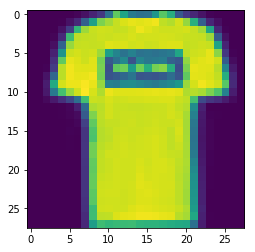

In [31]:
x_geo=dataset.filtering(x_train[1,:,:,0])
plt.imshow(x_geo)
plt.savefig('../results/filtered_images.png')

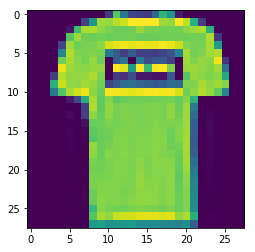

In [33]:
plt.imshow(x_train[1,:,:,0])
plt.savefig('../results/normal_images.png')

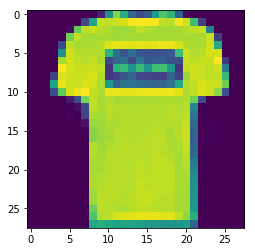

In [34]:
x_den=dataset.denoising(x_train[1,:,:,0])
plt.imshow(x_den)
plt.savefig('../results/denoised_images.png')

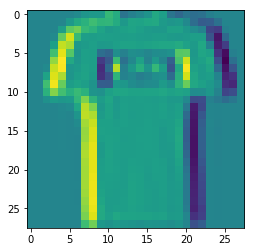

In [35]:
x_ed=dataset.edge_detection(x_train[1,:,:,0])
plt.imshow(x_ed)
plt.savefig('../results/edge_images.png')